### Objectives
1. Generate N independent random numbers, uniformly distributed between [-1,1].
    + Compute the mean of N numbers.
    + Compute the standard deviation of N numbers.
    + Compute the median of N numbers.
    + Output results.
2. Repeat step [1] for N of increasing powers of 10.
3. Record observations.
4. Repeat step [2] multiple times.
5. Record observations, contrasting with those in [4].
6. Speculate about correctness and testability

### Preparation
1. Verify understanding of key concepts in task context
    + Uniform Distribution
    + Independent rng
    + Mean
    + Standard deviation
    + Median
+ Survey tools, make determination
    * language
    * libraries

### Results of preperation
1. Key concepts working knowledge
   + Uniform distribution: Parameters A and B describe the limits of a continuous set of potential values. Every interval of equal length along that set is equally probable. In the context of this task, (a,b) = (-1,1).
   + Given U(a,b) where (a,b) = (-1,1), any independent randomly generated numbers N will fall with equal probability between those limits, inclusive.
   + Mean = (n1 + n2 + ... nx) / n
   + Median = (n[#x%2]+ n[#x%2+0.5])/2
   + Standard deviation is measurement of the amount of dispersion in a set of data. In other words, average distance of data points from the mean. High SD indicates wide dispersion (high avg distance from mean); low SD indicates narrow dispersion (low avg distance from mean).
2. Survey tools, make determination
   + Language
     * C# has too much boilerplate for simple plotting. Libraries are underdeveloped and disprefered by scientific community.
     * Python, specifically using the matplotlib and numpy, has wide adoption, resources, looks like it will be much quicker to set up.
     * Using Jupyter notebooks for documentation of observations inlined with code and results looks perfect for task and easy to get up and running.

#### Setup

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def genData(size):
    data = np.random.uniform(-1, 1, size)
    return data

def printCalcs(data):
    print("Mean: ", np.mean(data))
    print("Median: ", np.median(data))
    print("SD: ", np.std(data))
    
def histo(data, size):
    count, bins, ignored = plt.hist(data, size, facecolor='green') 
    plt.xlabel('X~U[0,1]')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show(block = False)

def fullOutput(size):
    data = genData(size)
    printCalcs(data)
    histo(data, size)

#### Generate set of 10 random numbers between -1,1

In [29]:
data = genData(10)

#### Calculate mean, median, standard deviation

In [30]:
printCalcs(data)

Mean:  -0.423940201336
Median:  -0.483738492381
SD:  0.350820701908


#### Output raw data

In [31]:
print(data)

[-0.33678951 -0.44403609  0.10933473 -0.61603916 -0.80870812 -0.5234409
 -0.09457249 -0.62158225 -0.9969564   0.09338816]


#### Output histogram of data

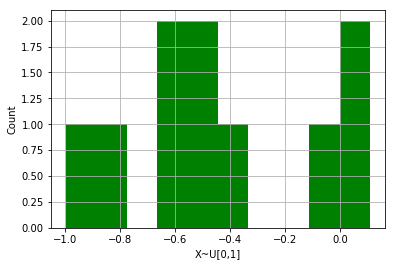

In [32]:
histo(data, size)

#### Repeat for increasing powers

Mean:  -0.103330129777
Median:  -0.100635010969
SD:  0.563322147484


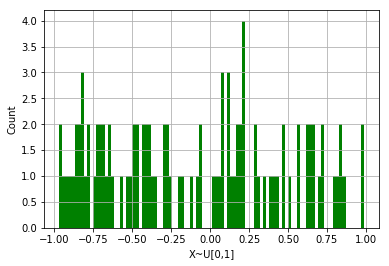

In [33]:
fullOutput(100)

Mean:  -0.00141264818027
Median:  -0.0352477977054
SD:  0.57711680323


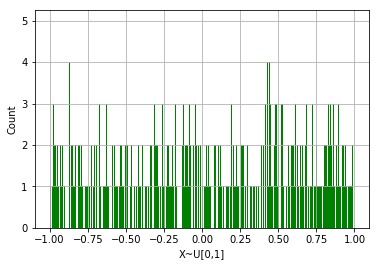

In [34]:
fullOutput(1000)

Mean:  -0.00175243132915
Median:  -0.00553345390625
SD:  0.580105078142


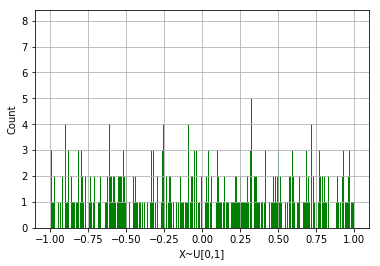

In [35]:
fullOutput(10000)

### Observations first pass
* Mean and median approach 0 (the midpoint of [-1,1] as sample size increases
* Standard deviation increases toward .577~ as sample size increases, i.e. approaches (min - max)/sqrt(12).

#### Speculation
Given a sample size of 1 point of data and zero knowledge of the function that produced it, there is no way to draw any conclusion as to the behavior of that function. The usefulness of a sample size in drawing such a conclusion will scale with its size.

Given a uniform distribution, where every equal interval in (A,B) is equally likely, how would we expect the mean, median, and standard deviation to behave as various sample sizes?
    
As observed, the mean and median appoach 0 as sample size increases. For small samples, the uniform probability implies there should be high variance in the data. For instance, given a sample size of 2, N and M, there is a 50% chance that N will be any value greater than M, and vice versa, skewing the mean/median accordingly.
    
But since there is 50% chance of a data point being greater than the midpoint, and 50% chance of it being less than the midpoint, as the density increases, the mean and median should tend asymptotically toward that midpoint. In other words, given an infinitely large sample set, both mean and median would be equal to the midpoint of U(a,b).
    
Likewise, the standard deviation calculated for small sets of data, will poorly reflect the standard deviation for uniform distributions of higher density, where the variance is 1/12(b-a)^2. As our sample sizes increase, our calculations approach that value.

#### Multiple repeats for data contrast.

In [39]:
def outputEveryPower():
    print("SAMPLE SIZE 10")
    fullOutput(10)
    print("SAMPLE SIZE 100")
    fullOutput(100)
    print("SAMPLE SIZE 1000")
    fullOutput(1000)
    print("SAMPLE SIZE 10000")
    fullOutput(10000)

OUTPUT 1
SAMPLE SIZE 10
Mean:  -0.0296342354149
Median:  -0.237225396221
SD:  0.574991582777


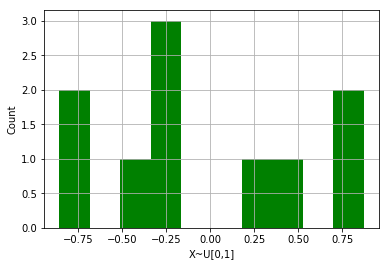

SAMPLE SIZE 100
Mean:  0.0295325222631
Median:  0.0436867217213
SD:  0.573885309997


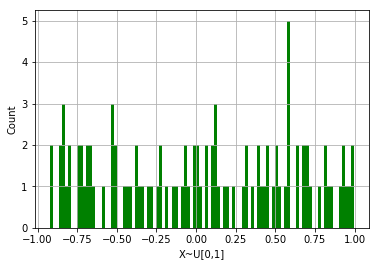

SAMPLE SIZE 1000
Mean:  -0.0136075164684
Median:  0.0184939004483
SD:  0.581350586074


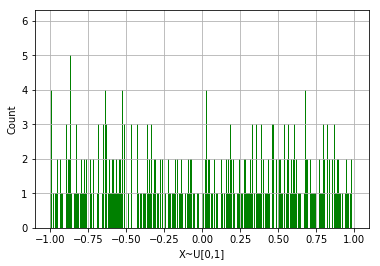

SAMPLE SIZE 10000
Mean:  -0.00120733718325
Median:  -0.00959876573491
SD:  0.578469606912


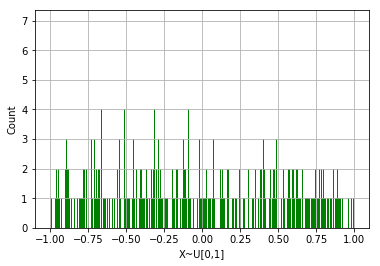

OUTPUT 2
SAMPLE SIZE 10
Mean:  -0.332723080762
Median:  -0.470916819607
SD:  0.552263354511


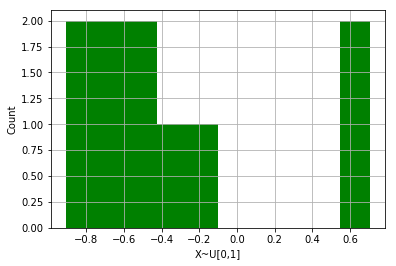

SAMPLE SIZE 100
Mean:  -0.0136348519161
Median:  -0.0812568081516
SD:  0.592638102248


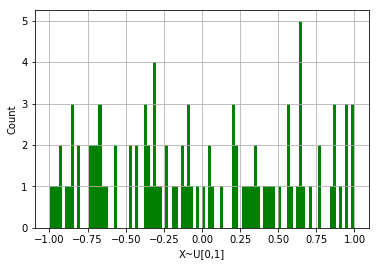

SAMPLE SIZE 1000
Mean:  0.00865264778411
Median:  0.00737834671186
SD:  0.576180798807


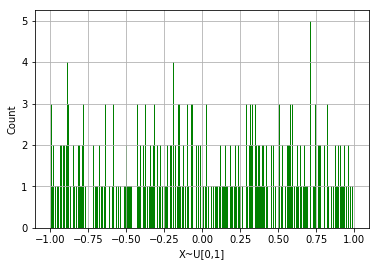

SAMPLE SIZE 10000
Mean:  -0.00130277082978
Median:  0.000173564881743
SD:  0.577806186575


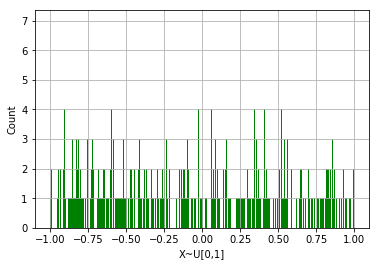

OUTPUT 3
SAMPLE SIZE 10
Mean:  -0.0230009774759
Median:  -0.00782985717678
SD:  0.45514164861


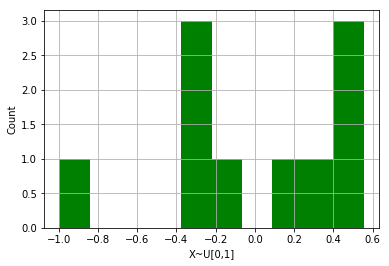

SAMPLE SIZE 100
Mean:  0.0182725668242
Median:  0.0224065236863
SD:  0.587662605356


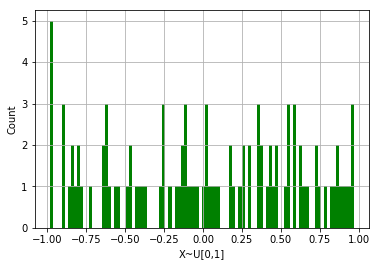

SAMPLE SIZE 1000
Mean:  0.00720186383915
Median:  -0.00707739315556
SD:  0.580101829606


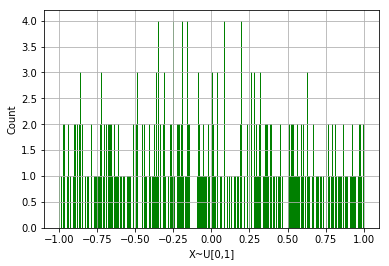

SAMPLE SIZE 10000
Mean:  -0.00528614620773
Median:  -0.0194629315157
SD:  0.572296660281


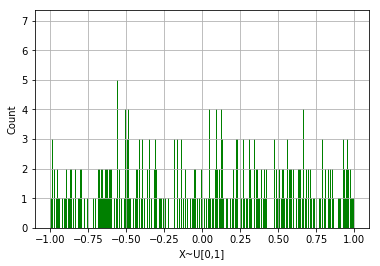

OUTPUT 4
SAMPLE SIZE 10
Mean:  0.136571664162
Median:  0.226075427097
SD:  0.629130959356


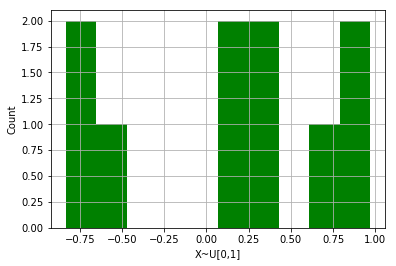

SAMPLE SIZE 100
Mean:  -0.0478619822304
Median:  -0.110110061992
SD:  0.598546292823


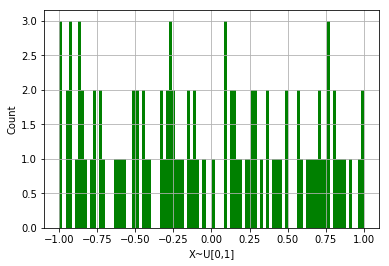

SAMPLE SIZE 1000
Mean:  -0.0258834708785
Median:  -0.0341354124637
SD:  0.577085860347


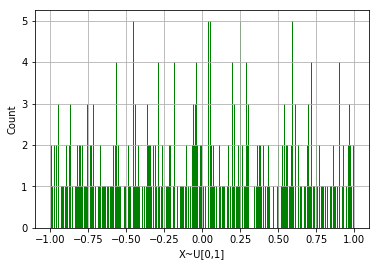

SAMPLE SIZE 10000
Mean:  0.00348144844127
Median:  0.00444988434996
SD:  0.57746304398


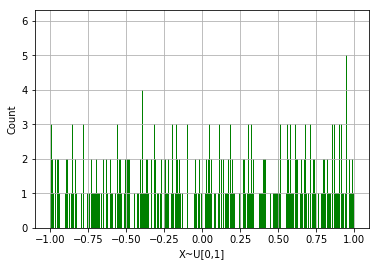

OUTPUT 5
SAMPLE SIZE 10
Mean:  0.0471157749583
Median:  -0.03345020276
SD:  0.586093150403


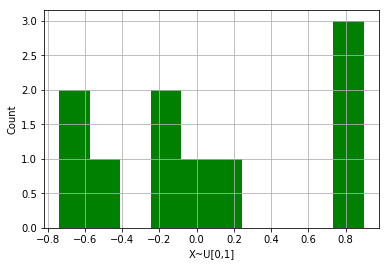

SAMPLE SIZE 100
Mean:  0.0505718985504
Median:  0.0420671174482
SD:  0.533275912435


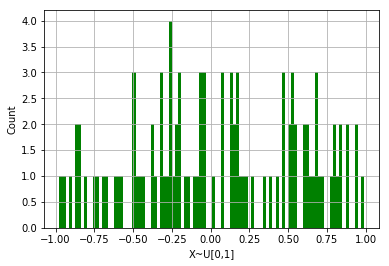

SAMPLE SIZE 1000
Mean:  -0.0303082268312
Median:  -0.0472633793044
SD:  0.584305975608


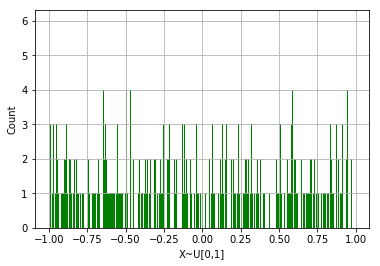

SAMPLE SIZE 10000
Mean:  -0.00972388909054
Median:  -0.017973771685
SD:  0.574406568911


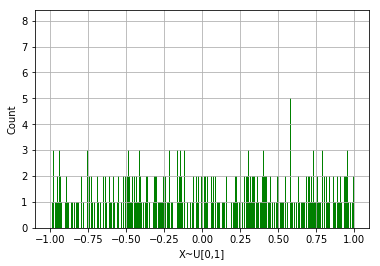

In [40]:
print("OUTPUT 1")
outputEveryPower()
print("OUTPUT 2")
outputEveryPower()
print("OUTPUT 3")
outputEveryPower()
print("OUTPUT 4")
outputEveryPower()
print("OUTPUT 5")
outputEveryPower()

### Observations second pass

The repeated outputs are consistent with observations made on the first set of outputs. Observed in OUTPUT 3/SAMPLE SIZE 10 of this set, but not the initial set of data is the occurence of a heavily skewed mean. This is compatible with the high variance in smaller samples.

There are still a few questions, however. 

Firstly, what is the rate we should expect to observe the data converging on expected values for increasing sample sizes?

Further, what confidence levels can we assign, given a set of data whose function is unknown and a sample size of N, that we are, say, dealing with a uniform distribution? For small sizes of N, of course, no credence can be assigned. What effect do sample sizes have on credence levels?

### Some final notes on testing and testability

If we were interested in testing the above code, we should first determine what's worth testing and then, after that, assess the difficulties in going about it.

Firstly, it's worth mentioning that some code needs to be tested because the code itself difficult to reason about. Here, that's not the case. The code base is small and the functions that compose it are simple.

And if we wanted, to say, verify that mean/median/standard deviations were being correctly calculated, it would be easy to simply feed them test cases to check them against assertions.

The difficulty here is more a question of the precision and nature of the data produced by the RNG library. That's not so easy to test.

And I do not mean simply the more easily solved problem of how can you unit test RNG, whose solution is simply to use dependency injection, I mean instead: How do you go about testing the RNG itself, and say, verify that it's producing expected (pseudo) random values?

Interestingly, I think that the answer to this question has been produced by the assigned task itself.

Namely, we have a set of expected values and behaviors arising from the nature of uniform distributions. For instance, that both the mean and median should asymptotically approach zero as density increases. And that variance should approach 1/12(b-a)^2. Now, any well-behaved RNG should adequate those expected values and exhibit expected behaviors at different sample sizes. If its behavior falls outside expected bounds, then we know there's a problem. In other words, the test for randomness is confirmed adherence to expected behaviors of randomness.
